In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# First look
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


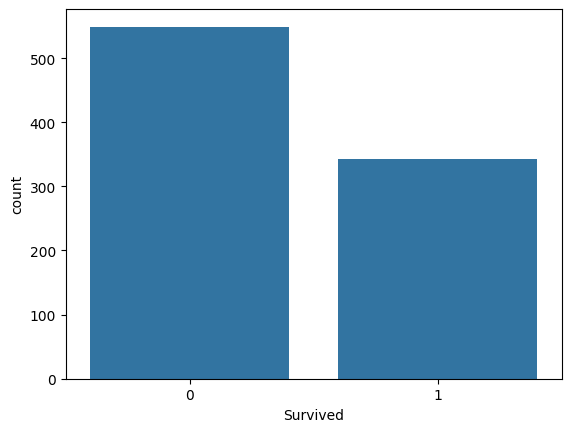

In [5]:
sns.countplot(x='Survived', data=df)
plt.show()

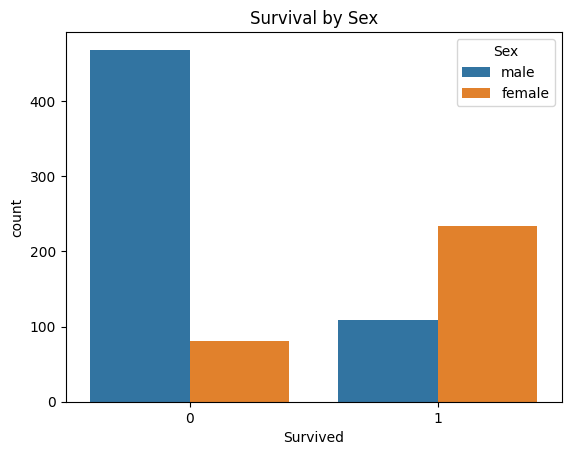

In [6]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()


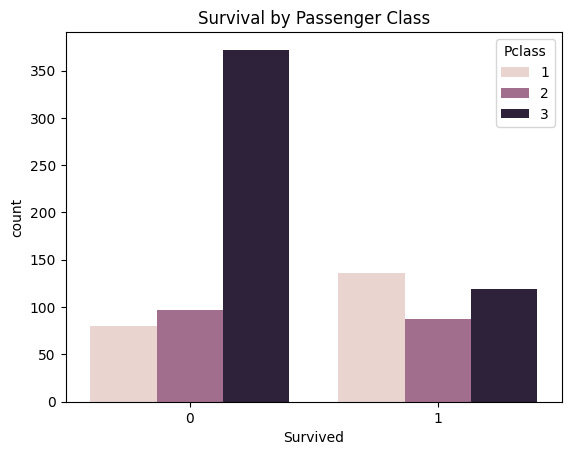

In [7]:
# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()


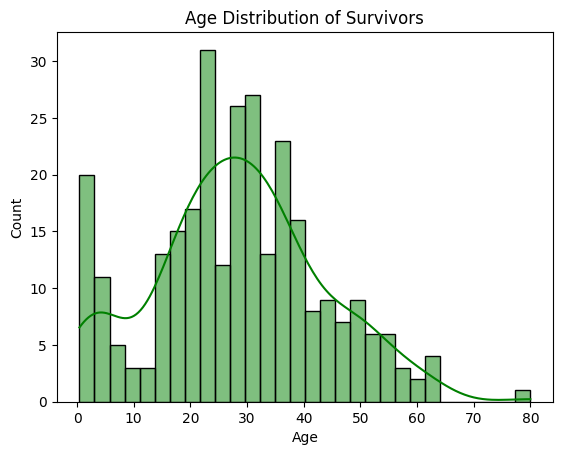

In [8]:
# Age distribution of survivors
sns.histplot(df[df['Survived']==1]['Age'].dropna(), bins=30, color='green', kde=True)
# kernel density estimate
plt.title("Age Distribution of Survivors")
plt.show()

In [13]:

df['Age'].fillna(df['Age'].median(), inplace=True)
# Since mode() returns a Series, [0] selects the first (and usually only) most frequent value.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


C:\Users\Krutika\AppData\Local\Temp\ipykernel_6572\4007823734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Krutika\AppData\Local\Temp\ipykernel_6572\4007823734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

Ah, great question! Let’s break it down **carefully**.

```python
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
```

This line is doing **one-hot encoding** of the categorical column `Embarked`. Here’s what each part means:

---

### **1️⃣ `pd.get_dummies(df, columns=['Embarked'])`**

* `pd.get_dummies()` converts **categorical variables** into **numeric dummy/indicator variables** (0 or 1), because most ML models in Scikit-Learn **cannot work with strings**.
* Example: Suppose `Embarked` has values: `['C', 'Q', 'S']`.
  After `get_dummies`, it becomes three new columns:

| Embarked_C | Embarked_Q | Embarked_S |
| ---------- | ---------- | ---------- |
| 1          | 0          | 0          |
| 0          | 1          | 0          |
| 0          | 0          | 1          |

---

### **2️⃣ `drop_first=True`**

* This **drops the first dummy column** to avoid **multicollinearity**.
* Multicollinearity is when one column can be perfectly predicted from the others — it can confuse models like **linear regression**.
* After `drop_first=True`, the first column (`Embarked_C`) is dropped, and the table becomes:

| Embarked_Q | Embarked_S |
| ---------- | ---------- |
| 0          | 0          |
| 1          | 0          |
| 0          | 1          |

* **Interpretation:**

  * If both `Embarked_Q` and `Embarked_S` are 0 → it must be `Embarked_C`.
  * This keeps the information intact but avoids redundant columns.

---

### **3️⃣ `df =`**

* This **assigns the new DataFrame** with the encoded columns back to `df`.

---

✅ **Summary:**
This line converts the categorical `Embarked` column into numeric dummy variables for ML, while avoiding redundancy by dropping the first category.

---

If you want, I can **draw a small diagram showing how `get_dummies` works visually**—it makes it much easier to remember. Do you want me to do that?

In [15]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,False,True


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



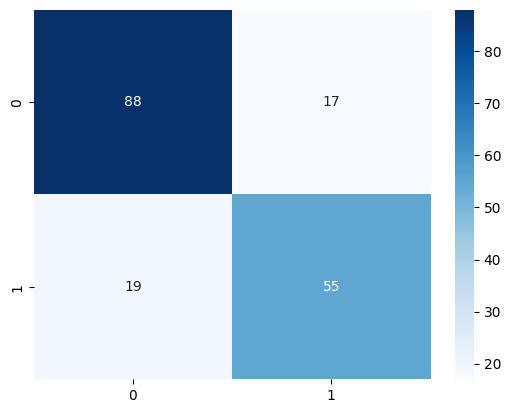

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features & target
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


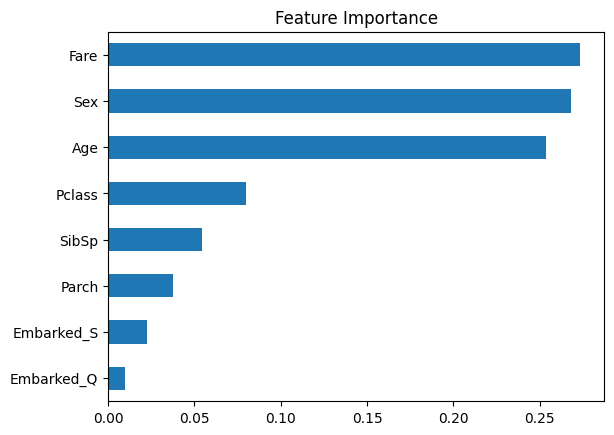

In [17]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
